<a href="https://colab.research.google.com/github/BadPrograms/ICA/blob/main/Independent%20Component%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ICA Function**

In [1]:
import math

import numpy as np


from scipy.special import expit


def ica(data, l_rate=0.001,  iter=800):
  
    n_samples, n_features = data.shape # σχήμα του σετ πληροφοριών μας
    block = 250 # Πόσο μεγάλο θα είναι το κομμάτι του που θα χρησιμοποιήσουμε πριν αλλάξουμε τα βάρη

    nblock = n_samples // block
    lastt = (nblock - 1) * block + 1

    #weights = np.identity(n_features)
    weights = np.random.uniform(0,10,(n_features,n_features))
    BI = block * np.identity(n_features) # Ο πίνακας Ι πολλαπλασιασμένος με το μέγεθος του μπλοκ
    step = 0
    while step <iter:
        print(step)

        permute = np.random.permutation(n_samples) # μπερδέυουμε τη σειρά του μπλοκ για να μην κολλήσει ο αλγόριθμος σε κάποιο pattern 

        for t in range(0, lastt, block):
            u = np.dot(data[permute[t:t + block], :], weights) 

          
            y = expit(u) # Η σιγμοειδής συνάρτηση
            weights += l_rate * np.dot(weights, BI + np.dot(u.T, (1.0 - 2.0 * y))) # αλλαγή βαρών

        l_rate *= 0.8 # Η σταδιακή αλλαγή του πόσο θα επιτραπεί να αλλάξουν τα βάρη
        step+=1
    print(step)
    return weights.T
   

In [2]:
import PIL as pil
from google.colab import files
import sys
import io
import wave
uploaded = files.upload()
#np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from numba import njit
import random
import matplotlib.pyplot as plt
from IPython.display import Audio, display
from scipy.io import wavfile as wf

# **Sound Signals**
 


(110000,)


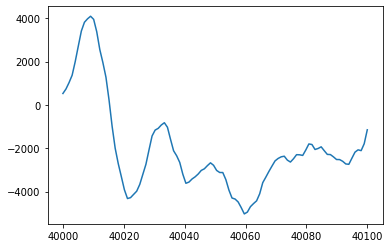

In [4]:
_1,s1=wf.read("beet.wav")
_2,s2=wf.read("beet9.wav")
_3,s3=wf.read("mike.wav")
_4,s4=wf.read("beet92.wav")
_5,s5=wf.read("street.wav")
_6,s6=wf.read("ssm2.wav")
_7,s7=wf.read("ssm1.wav")
_8,s8=wf.read("sss1.wav")
_9,s9=wf.read("sss2.wav")
print(s7.shape)
display(Audio(s6,rate=_7, autoplay=True))
plt.plot(np.linspace(40000,40100,100),s8[40000:40100])

In [76]:
import scipy.stats as stats
#plt.hist(s8)
#print(stats.kurtosis(s8))

In [11]:

x = np.stack((s2[:100000],s1[:100000],s3[:100000],s4[:100000],s5[:100000],s6[:100000],s7[:100000],s8[:100000],s9[:100000]))

x=x/(np.max(np.max(np.abs(x), axis=0)))
A=np.random.uniform(10,size=(9,9))
u=np.dot(A,x)
for _ in range(8):
  print(stats.kurtosis(x[_]))
  print(stats.kurtosis(u[_]))

1.3421961631997155
0.7689884513597773
0.5667039145929271
0.4666900711500368
3.211354829526714
0.4645727580885457
1.5297548430473586
0.16814281836599987
0.6249017120956917
0.4387160894713529
0.24092845835691
0.4946937098556048
22.77785704784908
0.39467446287936037
7.58952136457947
0.582099491011435


In [82]:
display(Audio(x[0],rate=_1, autoplay=True))
display(Audio(u[1],rate=_2, autoplay=True))

In [83]:
a=ica(u.T)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

[[ 3.46372935e-01 -2.55847664e-01  1.20749883e+00 -4.40452852e-02
  -7.35856304e+01 -3.53756172e-01  3.21509921e-02 -1.83335259e-01
  -1.44409576e-01]
 [ 4.21588012e-01 -6.94881450e-02 -4.69395843e+01 -8.92739815e-02
  -1.37348199e+00 -3.22230953e-01 -6.78426022e-02  1.19442848e+00
   2.53316777e-01]
 [ 3.78348525e-02  9.08297921e-02  3.78947198e-01  5.29079578e-02
  -1.60423428e-02  2.77056845e-02 -3.24124149e+01 -7.56327279e-02
   4.51342431e-02]
 [-2.34652012e+01  5.17181991e-01 -4.19266190e-01  3.82126722e-02
  -1.41972684e-01 -5.44219200e-01 -6.08596604e-02  3.36463688e-02
   9.47711802e-02]
 [ 7.27653401e-02  1.65834607e+01 -1.89041092e-01  2.67677739e-01
  -1.14886913e+00 -5.36266686e-01  1.52618958e-01 -5.44705378e-02
   1.30169253e-01]
 [ 6.14326290e-02 -1.11727963e-01 -1.77634406e+00  3.92440251e-01
  -1.10012992e-01 -6.85134002e-02  2.77896880e-02  2.25585562e-01
  -1.35834584e+01]
 [-9.40893737e-01  9.38558012e-01 -1.47089180e+00  2.25422680e-01
  -2.71439125e+00  1.0076077

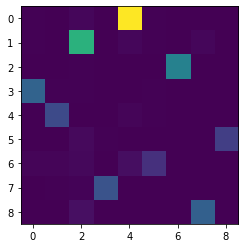

In [84]:
from pprint import pprint
#print(a)
b=(np.dot(a,u))
print(np.dot(a,A))
display(Audio(b[2],rate=_3, autoplay=True))
#display(Audio(x[3],rate=_3, autoplay=True))
plt.imshow(abs(np.dot(a,A)))

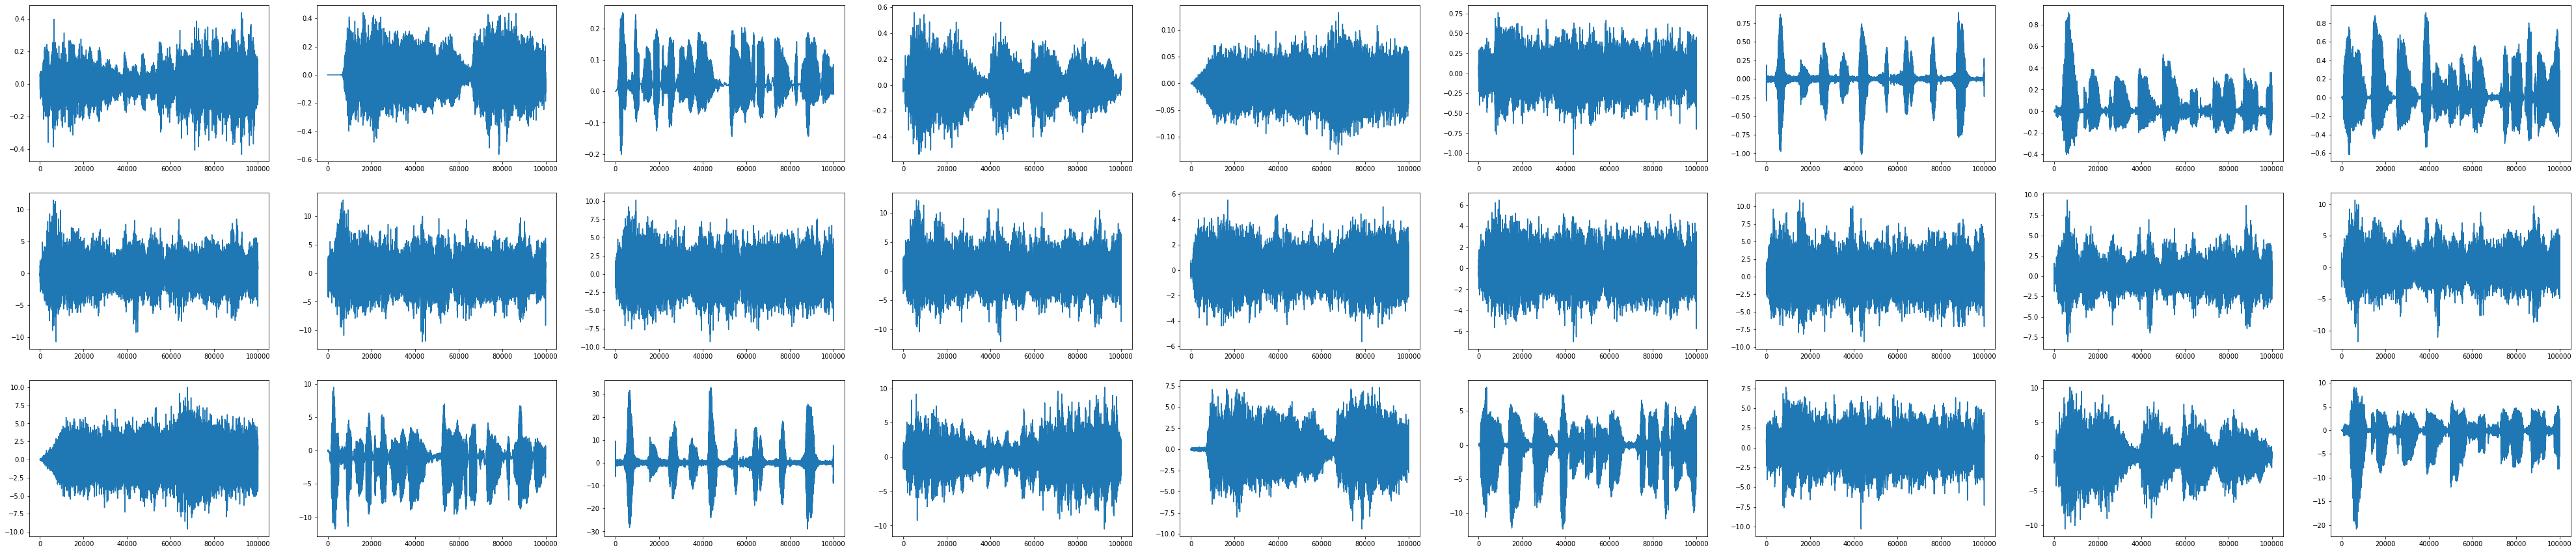

In [85]:


fig, ax = plt.subplots(nrows=3, ncols=9,figsize=(70, 15))

for i in range(9):
  ax[0,i].plot(x[i])
  
  ax[1,i].plot(u[i])
  ax[2,i].plot(b[i])
  

-1.4969084031281914
(3, 100000)


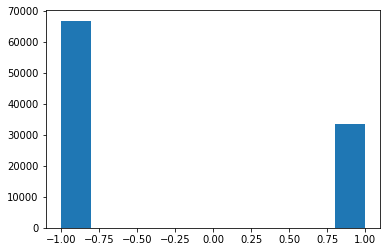

In [113]:
noise=np.zeros((100000))
for i in range(1000000):
  noise[random.randint(0,100000-1)]=1*(-1)**(random.randint(-1,1))
print(stats.kurtosis(noise))
x = np.stack((s2[:100000],noise,s3[:100000]))
plt.hist(noise)
x=x/(np.max(np.max(np.abs(x), axis=0)))
A=np.random.uniform(10,size=(3,3))
u=np.dot(A,x)
print(u.shape)

In [114]:
a=ica(u.T, l_rate=0.0001,  iter=800)
#print(a)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

[[ 1.00327763e+01 -4.83261526e+03 -5.77805015e-01]
 [-5.53547589e-01 -5.30323264e+03  1.90737439e+01]
 [-1.93541083e+00 -2.18270040e+04 -7.77875510e+00]]


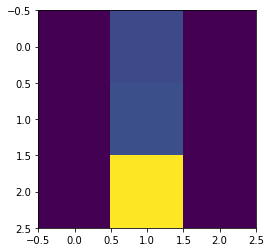

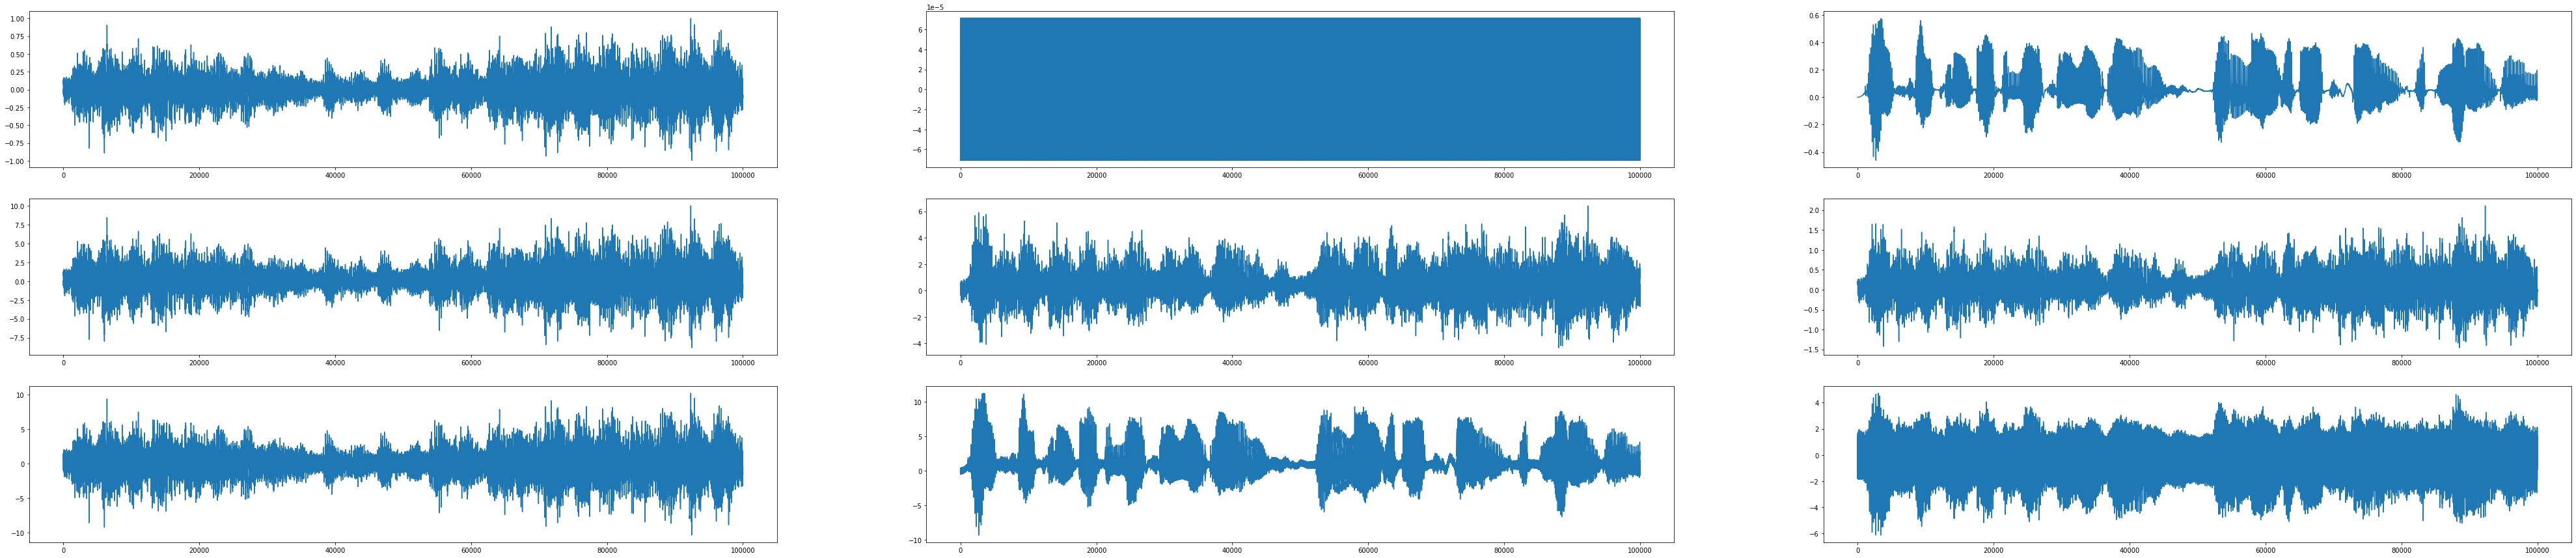

In [121]:
b=(np.dot(a,u))
print(np.dot(a,A))
display(Audio(u[2],rate=20000, autoplay=True))
#display(Audio(x[3],rate=_3, autoplay=True))
plt.imshow(abs(np.dot(a,A)))

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(70, 15))

for i in range(3):
  ax[0,i].plot(x[i])
  
  ax[1,i].plot(u[i])
  ax[2,i].plot(b[i])

#**Image signals**

In [3]:
import PIL as pil
uploaded2 = files.upload()


Saving forest.jpg to forest.jpg
Saving forest1.jpg to forest1.jpg
Saving forest3.jpg to forest3.jpg


(225, 225, 3)
(256, 256, 3)


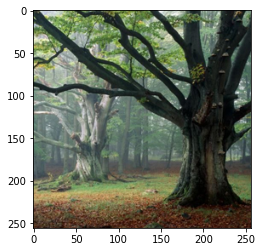

In [4]:
im1 = pil.Image.open(io.BytesIO(uploaded2['forest.jpg']))
#im.show()

plt.imshow(im1)









imarray3= np.array(pil.Image.open(io.BytesIO(uploaded2['forest1.jpg'])))

imarray1 = np. array(im1)
print(imarray1.shape)
plt.imshow(imarray1)
im2 = pil.Image.open(io.BytesIO(uploaded2['forest3.jpg']))
#im.show()

#plt.imshow(im2)


imarray2 = np. array(im2)
print(imarray2.shape)
plt.imshow(imarray2)

In [5]:
from scipy.stats import kurtosis

(225, 225, 3)
(225, 225, 3)
(225, 225, 3)


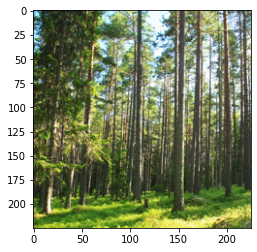

In [6]:
imarray1=imarray1[:225,:225]
print(imarray1.shape)
plt.imshow(imarray1,cmap="gray")
imarray3=imarray3[:225,:225]
print(imarray3.shape)
plt.imshow(imarray3,cmap="gray")
imarray2=imarray2[:225,:225]
print(imarray2.shape)
plt.imshow(imarray3,cmap="gray")

In [7]:
def flatten_img(im):
  
  vals=np.zeros((len(im)*len(im[0,:])))
  #print(vals[0,0])
  f=0
  for j in range(0,len(im)):
    for i in range(0,len(im)):
        vals[f]=im[i,j]
        f+=1
        #print(f)
  return vals
flim1=flatten_img(imarray1)
plt.plot(flim1)

print(stats.kurtosis(flim3))

ValueError: ignored

In [64]:
flim2=flatten_img(imarray2[:225,:225])
plt.plot(flim2)
flim3=flatten_img(imarray3[:225,:225,0])
plt.plot(flim3)

ValueError: ignored

(50625,)
-0.8297324766838132


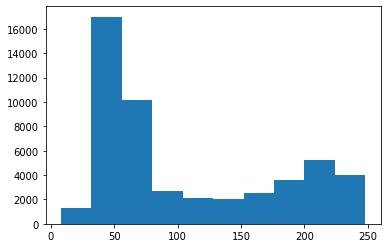

In [20]:
print(flim2.shape)
plt.hist(flim2)
print(stats.kurtosis(flim3))

In [8]:
#selecting randomly subimages
def sub_images(im,leng=11,times=10000):
  ims=np.zeros((leng,leng,times))
  for _ in range(times):
    i= np.random.randint(len(im)-leng-1)
    j=np.random.randint(len(im)-leng-1)
    for o in range(leng):
      for p in range(leng):
        ims[o,p,_]=im[o+i,p+j]
  return ims
print(imarray1[:,:,0].shape)
ar1=sub_images(imarray1[:,:,0])
ar2=sub_images(imarray2[:,:,0])
ar3=sub_images(imarray3[:,:,0])
#print(ar.shape)
a=np.zeros((121,30000))
for _ in range(10000):
  a[:,_]=ar1[:,:,_].reshape(-1)
  a[:,_+10000-1]=ar2[:,:,_].reshape(-1)
  a[:,_+20000-1]=ar3[:,:,_].reshape(-1)
print(a.shape)
#plt.hist(a)

(225, 225)
(121, 30000)


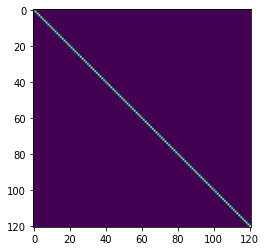

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_std=False)

Wz=np.linalg.inv(np.sqrt(a@a.T))
x=2*Wz@(scaler.fit_transform(a))
#x=x/(np.max(np.max(np.abs(x), axis=0)))
#plt.imshow(x@x.T)
def zca_whiten(X):
    """
    Applies ZCA whitening to the data (X)
    http://xcorr.net/2011/05/27/whiten-a-matrix-matlab-code/

    X: numpy 2d array
        input data, rows are data points, columns are features

    Returns: ZCA whitened 2d array
    """
    assert(X.ndim == 2)
    EPS = 10e-5

    #   covariance matrix
    cov = np.dot(X.T, X)
    #   d = (lambda1, lambda2, ..., lambdaN)
    d, E = np.linalg.eigh(cov)
    #   D = diag(d) ^ (-1/2)
    D = np.diag(1. / np.sqrt(d + EPS))
    #   W_zca = E * D * E.T
    W = np.dot(np.dot(E, D), E.T)

    X_white = np.dot(X, W)

    return X_white
whit=zca_whiten(a.T)
whit.shape
plt.imshow(whit.T@whit)

In [10]:

f=ica(whit, l_rate=0.001,  iter=3000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

(121, 121)


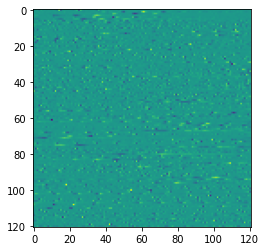

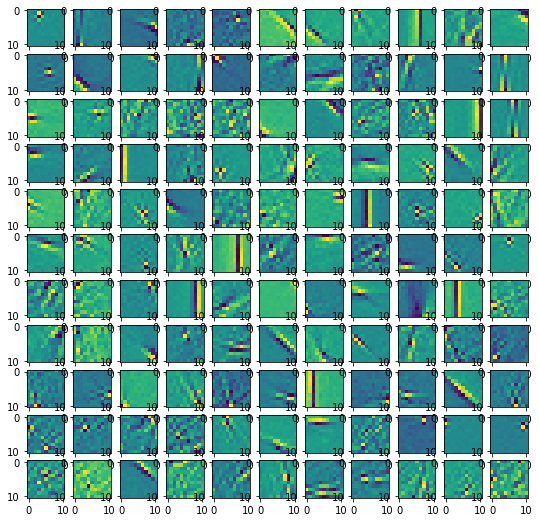

In [11]:
print(f.shape)
#plt.imshow((f[10].reshape(12,12)),cmap="gray")
#print(kurtosis(f[133]))
ar=[]
for _ in range(121):
  ar.append (kurtosis(f[_]))
#plt.plot(ar)
#plt.hist(f[:,103].reshape(-1))
plt.imshow(f)
ICAF=Wz@f
#plt.imshow(ICAF[76,:].reshape(12,12))
fig, ax = plt.subplots(nrows=11, ncols=11,figsize=(9, 9))

for j in range(11):
  for  i in range(11):

    ax[i,j].imshow(f[i+11*j].reshape(11,11))
    
    

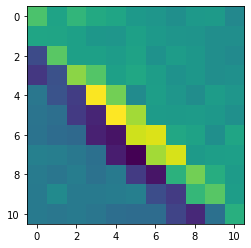

In [54]:
plt.imshow(f[121-14].reshape(11,11))

(235, 235)


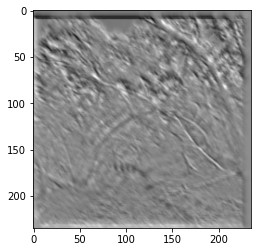

In [55]:
from scipy import signal
import cv2

filtered = signal.convolve(imarray1[:,:,0], f[12
                                              
                                              ].reshape(11,11)) 
print(filtered.shape)
plt.imshow(filtered,cmap="gray")

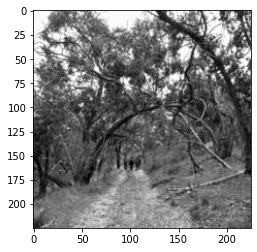

In [56]:
#plt.hist(imarray1[:,:,0])
plt.imshow(imarray1[:,:,0],cmap="gray")

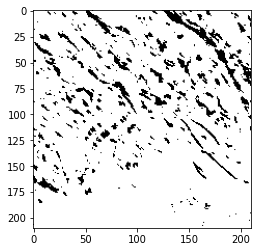

In [66]:
a=normalize(imarray1[:,:,0])-normalize(filtered[:225,:225])
a[a<0.001] = 0

# Set all values at indices where the array equals 255 to 1.
a[a>=0.01] = 255
#plt.hist(a)
plt.imshow(a[10:220,10:220],cmap="gray")

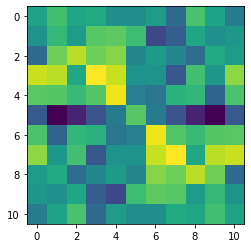

In [70]:
img_fft = np.fft.fft2(f[60].reshape(11,11))
img_fftshift = np.fft.fftshift(img_fft)
#print(img_fftshift)
plt.imshow(np.log(1+np.abs(img_fftshift)))

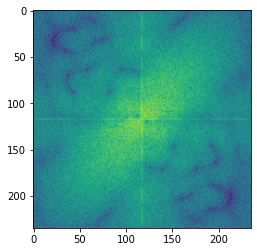

In [71]:
img_fft = np.fft.fft2(filtered)
img_fftshift = np.fft.fftshift(img_fft)
#print(img_fftshift)
plt.imshow(np.log(1+np.abs(img_fftshift)))

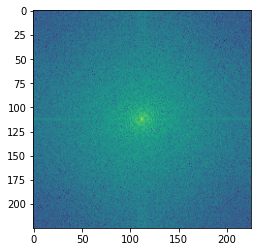

In [69]:
img_fft = np.fft.fft2(imarray1[:,:,0])
img_fftshift = np.fft.fftshift(img_fft)
#print(img_fftshift)
plt.imshow(np.log(1+np.abs(img_fftshift)))

In [23]:
f2=infomax(whit,max_iter=10000,use_bias=False,extended=False,return_n_iter=True)

[ 20.83973342  -5.55880069  72.93591899  25.92510667   4.20733331
  -7.61208821 -12.79185004 -32.44251458   0.25688478   1.84614387
  22.48586079  16.33163501  20.06992783 -34.02858671   6.7982096
 -10.27808411 -20.89458165  -9.59626053  19.5716727   27.10536696
   9.76587666  13.87571288  24.67796773  26.61260512  -4.81568774
 -27.39131718 -12.38869889 -22.24578947 -11.59149151   5.9977797
 -14.5735372   -8.6246968   -8.84490995  48.20630669  -4.5469027
  -1.01690162 -13.61990389  45.85506382   6.1441016   30.41982966
   9.96644385  18.51920021  -2.77616685 -18.89567762  53.93063085
  37.96818443  23.01701714 -16.37471878  11.36741005  29.49335586
  -3.81520198  10.14833142  11.77051265  10.67645219  23.80653758
 -48.60050572  17.58026306  11.95897707  -0.90327463  -2.8199751
  11.05366071 -44.96757042  -2.73244478  12.5998133  -11.22638203
   6.53164873 -21.68650736  66.24692543  53.49543298 -13.32387896
  43.79199752  -7.84419115   0.93308907  22.32309049 -13.60738131
  24.03910496 

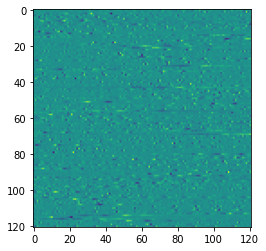

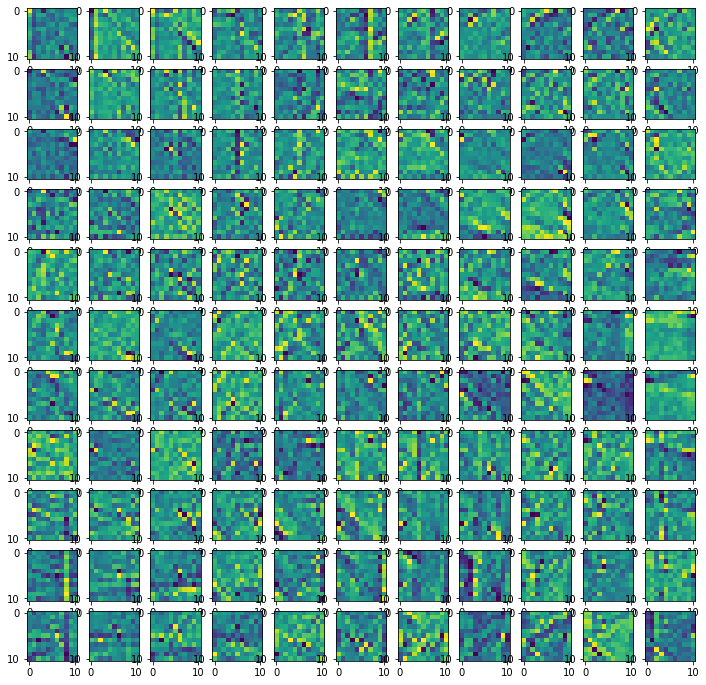

In [25]:
print(f2[1])
#f2=f2[0]
#plt.imshow((f2[100].reshape(12,12)),cmap="gray")
#print(kurtosis(f2[:,3]))
ar=[]
for _ in range(11):
  ar.append (kurtosis(f2[_]))
#plt.plot(ar)
#plt.hist(f[:,103].reshape(-1))
plt.imshow(f)
ICAF=Wz@f
#plt.imshow(ICAF[76,:].reshape(12,12))
fig, ax = plt.subplots(nrows=11, ncols=11,figsize=(12, 12))
for j in range(11):
  for  i in range(11):

    ax[i,j].imshow(ICAF[i+11*j].reshape(11,11))

In [116]:
(x2 = np.stack((flim1,flim2,flim3))
B=np.random.uniform(0.1,size=(3,2))
x2=x2/(np.max(np.max(np.abs(x2), axis=0)))
u2=np.dot(B,x2)
plt.plot(u2[0,:])

ValueError: ignored

In [137]:


def whiten(X):
    # Calculate the mean and covariance of the mixed signals
    mean = np.mean(X, axis=1, keepdims=True)
    cov = np.cov(X)

    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov)

    # Whiten the mixed signals by applying the linear transformation
    X_whitened = np.dot(np.dot(eigenvectors, np.diag(1.0 / np.sqrt(eigenvalues))),
                        (X - mean))

    return X_whitened
whit=whiten(u2)

In [15]:
def infomax(data, weights=None, l_rate=None, block=None, w_change=1e-20,
            anneal_deg=60., anneal_step=0.9, extended=False, n_subgauss=1,
            kurt_size=6000, ext_blocks=1, max_iter=200, random_state=None,
            blowup=1e4, blowup_fac=0.5, n_small_angle=20, use_bias=True,
            verbose=None, return_n_iter=False):
    """Run (extended) Infomax ICA decomposition on raw data.
    Parameters
    ----------
    data : np.ndarray, shape (n_samples, n_features)
        The whitened data to unmix.
    weights : np.ndarray, shape (n_features, n_features)
        The initialized unmixing matrix.
        Defaults to None, which means the identity matrix is used.
    l_rate : float
        This quantity indicates the relative size of the change in weights.
        Defaults to ``0.01 / log(n_features ** 2)``.
        .. note:: Smaller learning rates will slow down the ICA procedure.
    block : int
        The block size of randomly chosen data segments.
        Defaults to floor(sqrt(n_times / 3.)).
    w_change : float
        The change at which to stop iteration. Defaults to 1e-12.
    anneal_deg : float
        The angle (in degrees) at which the learning rate will be reduced.
        Defaults to 60.0.
    anneal_step : float
        The factor by which the learning rate will be reduced once
        ``anneal_deg`` is exceeded: ``l_rate *= anneal_step.``
        Defaults to 0.9.
    extended : bool
        Whether to use the extended Infomax algorithm or not.
        Defaults to True.
    n_subgauss : int
        The number of subgaussian components. Only considered for extended
        Infomax. Defaults to 1.
    kurt_size : int
        The window size for kurtosis estimation. Only considered for extended
        Infomax. Defaults to 6000.
    ext_blocks : int
        Only considered for extended Infomax. If positive, denotes the number
        of blocks after which to recompute the kurtosis, which is used to
        estimate the signs of the sources. In this case, the number of
        sub-gaussian sources is automatically determined.
        If negative, the number of sub-gaussian sources to be used is fixed
        and equal to n_subgauss. In this case, the kurtosis is not estimated.
        Defaults to 1.
    max_iter : int
        The maximum number of iterations. Defaults to 200.
    %(random_state)s
    blowup : float
        The maximum difference allowed between two successive estimations of
        the unmixing matrix. Defaults to 10000.
    blowup_fac : float
        The factor by which the learning rate will be reduced if the difference
        between two successive estimations of the unmixing matrix exceededs
        ``blowup``: ``l_rate *= blowup_fac``. Defaults to 0.5.
    n_small_angle : int | None
        The maximum number of allowed steps in which the angle between two
        successive estimations of the unmixing matrix is less than
        ``anneal_deg``. If None, this parameter is not taken into account to
        stop the iterations. Defaults to 20.
    use_bias : bool
        This quantity indicates if the bias should be computed.
        Defaults to True.
    %(verbose)s
    return_n_iter : bool
        Whether to return the number of iterations performed. Defaults to
        False.
    Returns
    -------
    unmixing_matrix : np.ndarray, shape (n_features, n_features)
        The linear unmixing operator.
    n_iter : int
        The number of iterations. Only returned if ``return_max_iter=True``.
    References
    ----------
    .. [1] A. J. Bell, T. J. Sejnowski. An information-maximization approach to
           blind separation and blind deconvolution. Neural Computation, 7(6),
           1129-1159, 1995.
    .. [2] T. W. Lee, M. Girolami, T. J. Sejnowski. Independent component
           analysis using an extended infomax algorithm for mixed subgaussian
           and supergaussian sources. Neural Computation, 11(2), 417-441, 1999.
    """
    from scipy.stats import kurtosis
    from scipy.special import expit

    rng = 0

    # define some default parameters
    max_weight = 1e8
    restart_fac = 0.9
    min_l_rate = 1e-10
    degconst = 180.0 / np.pi

    # for extended Infomax
    extmomentum = 0.5
    signsbias = 0.02
    signcount_threshold = 25
    signcount_step = 2

    # check data shape
    n_samples, n_features = data.shape
    n_features_square = n_features ** 2

    # check input parameters
    # heuristic default - may need adjustment for large or tiny data sets
    if l_rate is None:
        l_rate = 0.01 / math.log(n_features ** 2.0)

    if block is None:
        block = int(math.floor(math.sqrt(n_samples / 3.0)))

   
    # collect parameters
    nblock = n_samples // block
    lastt = (nblock - 1) * block + 1

    # initialize training
    if weights is None:
        weights = np.random.uniform(0,10,(n_features,n_features))
    else:
        weights = weights.T

    BI = block * np.identity(n_features, dtype=np.float64)
    bias = np.zeros((n_features, 1), dtype=np.float64)
    onesrow = np.ones((1, block), dtype=np.float64)
    startweights = weights.copy()
    oldweights = startweights.copy()
    step = 0
    count_small_angle = 0
    wts_blowup = False
    blockno = 0
    signcount = 0
    initial_ext_blocks = ext_blocks   # save the initial value in case of reset

    # for extended Infomax
    if extended:
        signs = np.ones(n_features)

        for k in range(n_subgauss):
            signs[k] = -1

        kurt_size = min(kurt_size, n_samples)
        old_kurt = np.zeros(n_features, dtype=np.float64)
        oldsigns = np.zeros(n_features)

    # trainings loop
    olddelta, oldchange = 1., 0.
    while step < max_iter:

        # shuffle data at each step
        permute = np.random.permutation(n_samples)

        # ICA training block
        # loop across block samples
        for t in range(0, lastt, block):
            u = np.dot(data[permute[t:t + block], :], weights)
            u += np.dot(bias, onesrow).T

            if extended:
                # extended ICA update
                y = np.tanh(u)
                weights += l_rate * np.dot(weights,
                                           BI -
                                           signs[None, :] * np.dot(u.T, y) -
                                           np.dot(u.T, u))
                if use_bias:
                    bias += l_rate * np.reshape(np.sum(y, axis=0,
                                                dtype=np.float64) * -2.0,
                                                (n_features, 1))

            else:
                # logistic ICA weights update
                y = expit(u)
                weights += l_rate * np.dot(weights,
                                           BI + np.dot(u.T, (1.0 - 2.0 * y)))

                if use_bias:
                    bias += l_rate * np.reshape(np.sum((1.0 - 2.0 * y), axis=0,
                                                dtype=np.float64),
                                                (n_features, 1))

            # check change limit
            max_weight_val = np.max(np.abs(weights))
            if max_weight_val > max_weight:
                wts_blowup = True

            blockno += 1
            if wts_blowup:
                break

            # ICA kurtosis estimation
            if extended:
                if ext_blocks > 0 and blockno % ext_blocks == 0:
                    if kurt_size < n_samples:
                        rp = np.floor(np.random.uniform(0, 1, kurt_size) *
                                      (n_samples - 1))
                        tpartact = np.dot(data[rp.astype(int), :], weights).T
                    else:
                        tpartact = np.dot(data, weights).T

                    # estimate kurtosis
                    kurt = kurtosis(tpartact, axis=1, fisher=True)

                    if extmomentum != 0:
                        kurt = (extmomentum * old_kurt +
                                (1.0 - extmomentum) * kurt)
                        old_kurt = kurt

                    # estimate weighted signs
                    signs = np.sign(kurt + signsbias)

                    ndiff = (signs - oldsigns != 0).sum()
                    if ndiff == 0:
                        signcount += 1
                    else:
                        signcount = 0
                    oldsigns = signs

                    if signcount >= signcount_threshold:
                        ext_blocks = np.fix(ext_blocks * signcount_step)
                        signcount = 0

        # here we continue after the for loop over the ICA training blocks
        # if weights in bounds:
        if not wts_blowup:
            oldwtchange = weights - oldweights
            step += 1
            angledelta = 0.0
            delta = oldwtchange.reshape(1, n_features_square)
            change = np.sum(delta * delta, dtype=np.float64)
            if step > 2:
                angledelta = math.acos(np.sum(delta * olddelta) /
                                       math.sqrt(change * oldchange))
                angledelta *= degconst

            if verbose:
                logger.info(
                    'step %d - lrate %5f, wchange %8.8f, angledelta %4.1f deg'
                    % (step, l_rate, change, angledelta))

            # anneal learning rate
            oldweights = weights.copy()
            if angledelta > anneal_deg:
                l_rate *= anneal_step    # anneal learning rate
                # accumulate angledelta until anneal_deg reaches l_rate
                olddelta = delta
                oldchange = change
                count_small_angle = 0  # reset count when angledelta is large
            else:
                if step == 1:  # on first step only
                    olddelta = delta  # initialize
                    oldchange = change

                if n_small_angle is not None:
                    count_small_angle += 1
                    if count_small_angle > n_small_angle:
                        max_iter = step

            # apply stopping rule
            if step > 2 and change < w_change:
                step = max_iter
            elif change > blowup:
                l_rate *= blowup_fac

        # restart if weights blow up (for lowering l_rate)
        else:
            step = 0  # start again
            wts_blowup = 0  # re-initialize variables
            blockno = 1
            l_rate *= restart_fac  # with lower learning rate
            weights = startweights.copy()
            oldweights = startweights.copy()
            olddelta = np.zeros((1, n_features_square), dtype=np.float64)
            bias = np.zeros((n_features, 1), dtype=np.float64)

            ext_blocks = initial_ext_blocks

            # for extended Infomax
            if extended:
                signs = np.ones(n_features)
                for k in range(n_subgauss):
                    signs[k] = -1
                oldsigns = np.zeros(n_features)

            if l_rate > min_l_rate:
                if verbose:
                    logger.info('... lowering learning rate to %g'
                                '\n... re-starting...' % l_rate)
            else:
                raise ValueError('Error in Infomax ICA: unmixing_matrix matrix'
                                 'might not be invertible!')

    # prepare return values
    if return_n_iter:
        return weights.T, step
    else:
        return weights.T

In [18]:
b=infomax(imarray2)

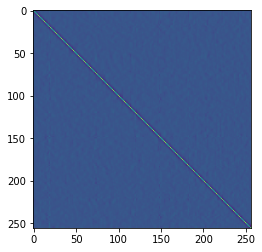

In [20]:
plt.imshow(b)

In [ ]:
plt.plot(-c[1,:])
print(c[1,:].shape)

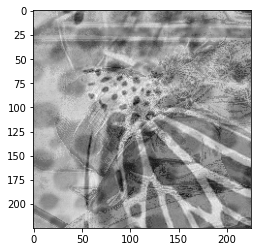

In [35]:
im1=c[2,:].reshape(225,225)
plt.imshow(im1,cmap="gray")



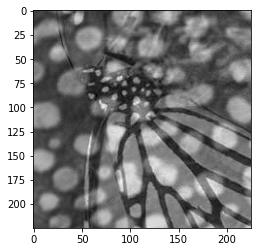

In [36]:
plt.imshow(u2[0,:].reshape(225,225),cmap='gray')

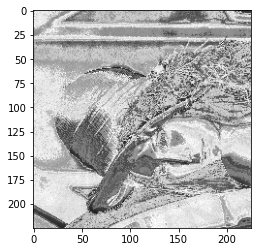

In [30]:
im2=-c[1,:].reshape(225,225)
plt.imshow(im2,cmap='gray')

In [23]:
from sklearn.decomposition import FastICA
ica=FastICA()
u2 = ica.fit_transform(u2.T)


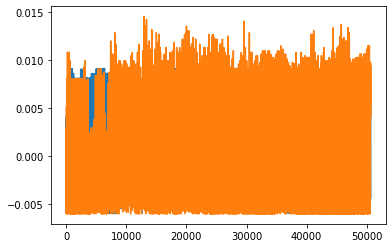

In [669]:
plt.plot(u2[:,0])
plt.plot(u2[:,1])

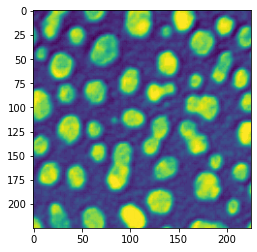

In [670]:
plt.imshow(deflatten_img(u2[:,0],225,225))

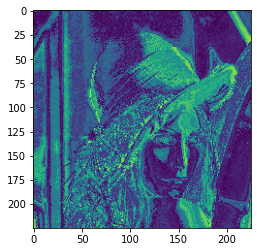

In [671]:
plt.imshow(deflatten_img(u2[:,1],225,225))